In [1]:
import sys
from importlib import reload 
sys.path.append('../hdssm_story/lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=False):
    return [
        ProductDistances([
            (10, Distances("euclidian_corrected" if for_ranking else "euclidian",
                           scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_corrected" if for_ranking else "triple_trainable_l0",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected" if for_ranking else "triple_trainable_l1_sq",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected" if for_ranking else "triple_trainable_l1",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_hs_corrected" if for_ranking else "triple_trainable_l1_hs",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_ex_corrected" if for_ranking else "triple_trainable_l1_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_ex_corrected" if for_ranking else "triple_trainable_l1_sq_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("hyperspherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]

_____________


In [8]:
!ls ../datasets

3d_sphere_triang_120.edges   clique_4.edges		  graph.clusters
3d_sphere_triang_1920.edges  clique_5.edges		  karate.edges
3d_sphere_triang_30.edges    conflict.edges		  polblogs.edges
3d_sphere_triang_480.edges   cora			  polbooks.edges
airport.edges		     CSPhDs.edges		  power.edges
bg_20_700_0.05.edges	     cycle_100.edges		  reactome.edges
bipartite_100.edges	     cycle_5.edges		  smalltree.edges
bipartite_5.edges	     dolphins.edges		  star_100.edges
ca-cit-HepTh.edges	     eu-core.edges		  star_5.edges
Ca-HelpTh.edges		     eu-core-no-self-loops.edges  tree_3_6.edges
chicago.edges		     euroroad.edges		  usca312.edges
citeseer		     EuroSiS.edges		  wla6.edges
clique_100.edges	     facebook.edges		  wla6.nodes
clique_12.edges		     football.edges


In [9]:
_, distances_matrix = utils.get_dataset("usca312")

Loading from ../datasets/usca312.edges


In [10]:
d = make_model()
qs = d.sparse_arange(312)  # queries
# r_matrix = 1 * (distances_matrix <= 1.001)  ## BUGS EVERYWHERE
distances_matrix.shape

(312, 312)

In [11]:
dm_copy = np.copy(distances_matrix)
r_matrix = np.copy(distances_matrix)

for i in range(dm_copy.shape[0]):
    dm_copy[i].sort()
    r_matrix[i] = distances_matrix[i] <= dm_copy[i, 1] + 1e-3
r_matrix -= np.eye(r_matrix.shape[0])

_____________________
# Training

In [12]:
distortion_loss_storyz = list()

In [13]:
def print_best_distortion():
    for i, d in enumerate(make_distances(False)+make_distances_exp_dot()):
        ar = np.array([
            distortion_loss_story_nth[i][-1]
            for distortion_loss_story_nth in distortion_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [14]:
def do_distortion_for_lr(lr=0.05):
    distortion_loss_storyz.append(
        utils.estimate_signatures_distortion(
            make_model_2, qs, distances_matrix, r_matrix,
            make_distances(False)+make_distances_exp_dot(), 2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            different_d_sum=True, print_results=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_distortion()

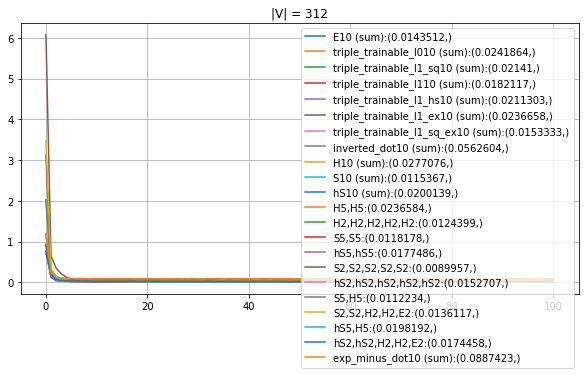


0.0143512	E10 (sum)
0.0241864	triple_trainable_l010 (sum)
0.02141	triple_trainable_l1_sq10 (sum)
0.0182117	triple_trainable_l110 (sum)
0.0211303	triple_trainable_l1_hs10 (sum)
0.0236658	triple_trainable_l1_ex10 (sum)
0.0153333	triple_trainable_l1_sq_ex10 (sum)
0.0562604	inverted_dot10 (sum)
0.0277076	H10 (sum)
0.0115367	S10 (sum)
0.0200139	hS10 (sum)
0.0236584	H5,H5
0.0124399	H2,H2,H2,H2,H2
0.0118178	S5,S5
0.0177486	hS5,hS5
0.0089957	S2,S2,S2,S2,S2
0.0152707	hS2,hS2,hS2,hS2,hS2
0.0112234	S5,H5
0.0136117	S2,S2,H2,H2,E2
0.0198192	hS5,H5
0.0174458	hS2,hS2,H2,H2,E2
0.0887423	exp_minus_dot10 (sum)


=== Current global best:

(0.0143512,)	E10 (sum)
(0.0241864,)	triple_trainable_l010 (sum)
(0.02141,)	triple_trainable_l1_sq10 (sum)
(0.0182117,)	triple_trainable_l110 (sum)
(0.0211303,)	triple_trainable_l1_hs10 (sum)
(0.0236658,)	triple_trainable_l1_ex10 (sum)
(0.0153333,)	triple_trainable_l1_sq_ex10 (sum)
(0.0562604,)	inverted_dot10 (sum)
(0.0277076,)	H10 (sum)
(0.0115367,)	S10 (sum)
(0.020013

In [15]:
do_distortion_for_lr(0.1)

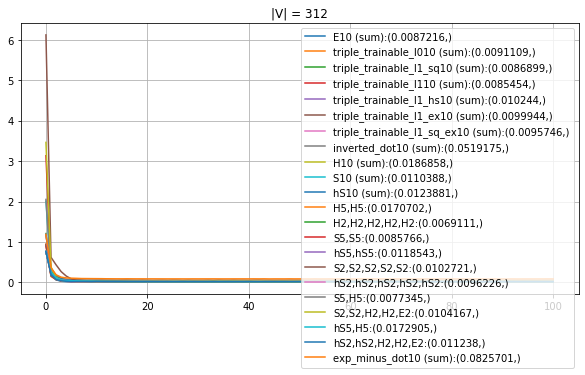


0.0087216	E10 (sum)
0.0091109	triple_trainable_l010 (sum)
0.0086899	triple_trainable_l1_sq10 (sum)
0.0085454	triple_trainable_l110 (sum)
0.010244	triple_trainable_l1_hs10 (sum)
0.0099944	triple_trainable_l1_ex10 (sum)
0.0095746	triple_trainable_l1_sq_ex10 (sum)
0.0519175	inverted_dot10 (sum)
0.0186858	H10 (sum)
0.0110388	S10 (sum)
0.0123881	hS10 (sum)
0.0170702	H5,H5
0.0069111	H2,H2,H2,H2,H2
0.0085766	S5,S5
0.0118543	hS5,hS5
0.0102721	S2,S2,S2,S2,S2
0.0096226	hS2,hS2,hS2,hS2,hS2
0.0077345	S5,H5
0.0104167	S2,S2,H2,H2,E2
0.0172905	hS5,H5
0.011238	hS2,hS2,H2,H2,E2
0.0825701	exp_minus_dot10 (sum)


=== Current global best:

(0.0087216,)	E10 (sum)
(0.0091109,)	triple_trainable_l010 (sum)
(0.0086899,)	triple_trainable_l1_sq10 (sum)
(0.0085454,)	triple_trainable_l110 (sum)
(0.010244,)	triple_trainable_l1_hs10 (sum)
(0.0099944,)	triple_trainable_l1_ex10 (sum)
(0.0095746,)	triple_trainable_l1_sq_ex10 (sum)
(0.0519175,)	inverted_dot10 (sum)
(0.0186858,)	H10 (sum)
(0.0110388,)	S10 (sum)
(0.01238

In [16]:
do_distortion_for_lr(0.05)

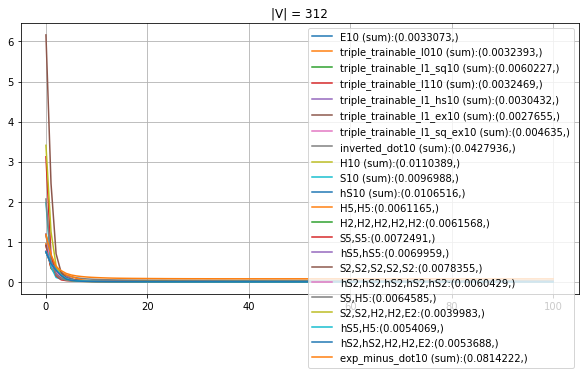


0.0033073	E10 (sum)
0.0032393	triple_trainable_l010 (sum)
0.0060227	triple_trainable_l1_sq10 (sum)
0.0032469	triple_trainable_l110 (sum)
0.0030432	triple_trainable_l1_hs10 (sum)
0.0027655	triple_trainable_l1_ex10 (sum)
0.004635	triple_trainable_l1_sq_ex10 (sum)
0.0427936	inverted_dot10 (sum)
0.0110389	H10 (sum)
0.0096988	S10 (sum)
0.0106516	hS10 (sum)
0.0061165	H5,H5
0.0061568	H2,H2,H2,H2,H2
0.0072491	S5,S5
0.0069959	hS5,hS5
0.0078355	S2,S2,S2,S2,S2
0.0060429	hS2,hS2,hS2,hS2,hS2
0.0064585	S5,H5
0.0039983	S2,S2,H2,H2,E2
0.0054069	hS5,H5
0.0053688	hS2,hS2,H2,H2,E2
0.0814222	exp_minus_dot10 (sum)


=== Current global best:

(0.0033073,)	E10 (sum)
(0.0032393,)	triple_trainable_l010 (sum)
(0.0060227,)	triple_trainable_l1_sq10 (sum)
(0.0032469,)	triple_trainable_l110 (sum)
(0.0030432,)	triple_trainable_l1_hs10 (sum)
(0.0027655,)	triple_trainable_l1_ex10 (sum)
(0.004635,)	triple_trainable_l1_sq_ex10 (sum)
(0.0427936,)	inverted_dot10 (sum)
(0.0110389,)	H10 (sum)
(0.0096988,)	S10 (sum)
(0.0106

In [17]:
do_distortion_for_lr(0.01)

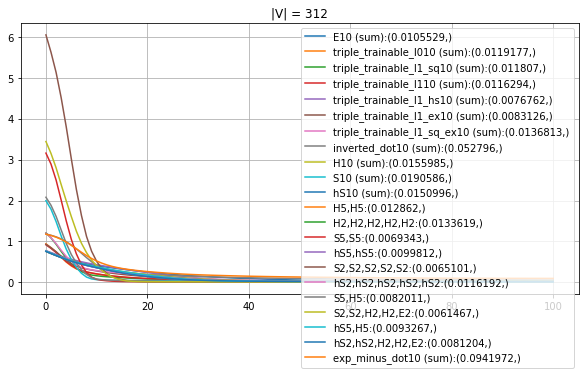


0.0105529	E10 (sum)
0.0119177	triple_trainable_l010 (sum)
0.011807	triple_trainable_l1_sq10 (sum)
0.0116294	triple_trainable_l110 (sum)
0.0076762	triple_trainable_l1_hs10 (sum)
0.0083126	triple_trainable_l1_ex10 (sum)
0.0136813	triple_trainable_l1_sq_ex10 (sum)
0.052796	inverted_dot10 (sum)
0.0155985	H10 (sum)
0.0190586	S10 (sum)
0.0150996	hS10 (sum)
0.012862	H5,H5
0.0133619	H2,H2,H2,H2,H2
0.0069343	S5,S5
0.0099812	hS5,hS5
0.0065101	S2,S2,S2,S2,S2
0.0116192	hS2,hS2,hS2,hS2,hS2
0.0082011	S5,H5
0.0061467	S2,S2,H2,H2,E2
0.0093267	hS5,H5
0.0081204	hS2,hS2,H2,H2,E2
0.0941972	exp_minus_dot10 (sum)


=== Current global best:

(0.0033073,)	E10 (sum)
(0.0032393,)	triple_trainable_l010 (sum)
(0.0060227,)	triple_trainable_l1_sq10 (sum)
(0.0032469,)	triple_trainable_l110 (sum)
(0.0030432,)	triple_trainable_l1_hs10 (sum)
(0.0027655,)	triple_trainable_l1_ex10 (sum)
(0.004635,)	triple_trainable_l1_sq_ex10 (sum)
(0.0427936,)	inverted_dot10 (sum)
(0.0110389,)	H10 (sum)
(0.0096988,)	S10 (sum)
(0.010651

In [18]:
do_distortion_for_lr(0.001)

In [26]:
softmax_loss_storyz = list()

In [27]:
def print_best_softmax():
    for i, d in enumerate(make_distances(True)+make_distances_exp_dot()):
        ar = np.array([
            softmax_loss_story_nth[i][-1]
            for softmax_loss_story_nth in softmax_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [28]:
def do_softmax_for_lr(lr=0.05):
    softmax_loss_storyz.append(
        utils.estimate_signatures_softmax(
            make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
            dists=make_distances(True)+make_distances_exp_dot(), iters=2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            print_results=True, different_d_sum=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_softmax()

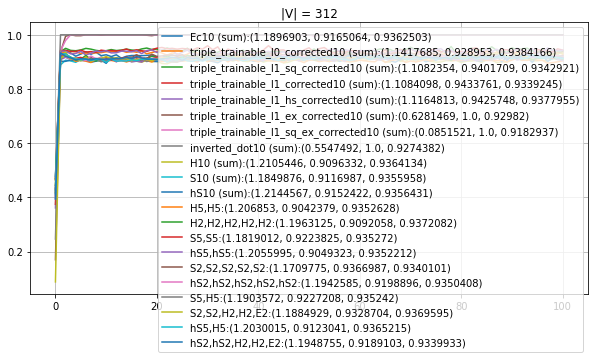

1961:1.1954925537666712
1962:1.1964900619610241
1963:1.1969340270585944
1964:1.1967099952615932
1965:1.195805588959402
1966:1.1969139487373135
1967:1.1953610282724079
1968:1.1974358265138416
1969:1.1955544998564207
1970:1.1961217373820574
1971:1.1960597883718762
1972:1.195603418684734
1973:1.19748389800236
1974:1.195411825523383
1975:1.1964083343686767
1976:1.1947942148487822


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
do_softmax_for_lr(0.1)

In [ ]:
do_softmax_for_lr(0.05)

In [ ]:
do_softmax_for_lr(0.01)

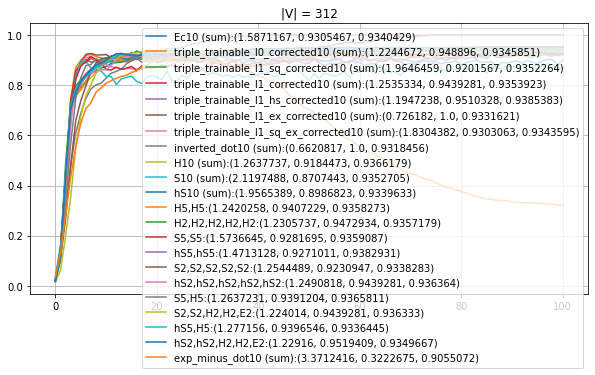


0.9305467	Ec10 (sum)
0.948896	triple_trainable_l0_corrected10 (sum)
0.9201567	triple_trainable_l1_sq_corrected10 (sum)
0.9439281	triple_trainable_l1_corrected10 (sum)
0.9510328	triple_trainable_l1_hs_corrected10 (sum)
1.0	triple_trainable_l1_ex_corrected10 (sum)
0.9303063	triple_trainable_l1_sq_ex_corrected10 (sum)
1.0	inverted_dot10 (sum)
0.9184473	H10 (sum)
0.8707443	S10 (sum)
0.8986823	hS10 (sum)
0.9407229	H5,H5
0.9472934	H2,H2,H2,H2,H2
0.9281695	S5,S5
0.9271011	hS5,hS5
0.9230947	S2,S2,S2,S2,S2
0.9439281	hS2,hS2,hS2,hS2,hS2
0.9391204	S5,H5
0.9439281	S2,S2,H2,H2,E2
0.9396546	hS5,H5
0.9519409	hS2,hS2,H2,H2,E2
0.3222675	exp_minus_dot10 (sum)


=== Current global best:

(1.1858872, 0.9305467, 0.9372226)	Ec10 (sum)
(1.0991968, 0.9537927, 0.9384166)	triple_trainable_l0_corrected10 (sum)
(1.0799087, 0.9465812, 0.9380716)	triple_trainable_l1_sq_corrected10 (sum)
(1.0944114, 0.9521902, 0.9363299)	triple_trainable_l1_corrected10 (sum)
(1.0926686, 0.9511218, 0.9385383)	triple_trainable_l1_hs_

In [32]:
do_softmax_for_lr(0.001)